In [11]:
import sys

sys.path.append("../src")

In [12]:
import make_hamiltonian
import importlib
from scipy import sparse
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
import green_function

importlib.reload(green_function)
importlib.reload(make_hamiltonian)
from make_hamiltonian import *

from green_function import *

In [13]:
sp_ops = Hamiltonian.make_spin_ops()
sz = sp_ops["Sz"]
sp = sp_ops["S+"]
sm = sp_ops["S-"]
sx = sp_ops["Sx"]
s0 = sp_ops["I"]

In [25]:
L = 12
h0 = sparse.csr_matrix((2**L, 2**L))
h1 = sparse.csr_matrix((2**L, 2**L))
for site_index in range(L):
    h0 += Hamiltonian.create_single_site_operator_matrix(sx, site_index, L)
for site_index in range(L):
    next_site_index = (site_index + 1) % L
    h1 += Hamiltonian.create_two_site_operator_matrix(
        sz, site_index, sz, next_site_index, L
    )

s0js = []
sks = []
hs = np.linspace(0, 1, 11)
for h in hs:
    print(h)
    eigsh(h0 + h * h1, k=3, which="LA", sigma=-20)
    eigenvalues, eigenvectors = eigsh(h1, k=3, which="LA", sigma=-10)
    s0j = calculate_total_correlation(eigenvalues, eigenvectors, L, sz)
    print(s0j)
    sk = np.fft.fft(s0j)
    ks = np.fft.fftfreq(L)
    s0js.append(s0j)
    sks.append(sk)
    print(np.abs(sk[0]))

0.0
[-0.739162125989075, 0.2608378740109247, -0.739162125989075, 0.2608378740109247, -0.739162125989075, 0.2608378740109247, -0.739162125989075, 0.2608378740109247, -0.739162125989075, 0.2608378740109247, -0.739162125989075]
3.1307833858798273
0.1
[-0.7510524632768925, 0.24894753672310804, -0.7510524632768925, 0.24894753672310804, -0.7510524632768925, 0.24894753672310804, -0.7510524632768925, 0.24894753672310804, -0.7510524632768925, 0.24894753672310804, -0.7510524632768925]
3.261577096045815
0.2
[-1.4727782682373591, -0.47277826823735847, -1.4727782682373591, -0.47277826823735847, -1.4727782682373591, -0.47277826823735847, -1.4727782682373591, -0.47277826823735847, -1.4727782682373591, -0.47277826823735847, -1.4727782682373591]
11.200560950610946
0.30000000000000004
[-0.5806315814093524, 0.419368418590647, -0.5806315814093524, 0.419368418590647, -0.5806315814093524, 0.419368418590647, -0.5806315814093524, 0.419368418590647, -0.5806315814093524, 0.419368418590647, -0.5806315814093524]


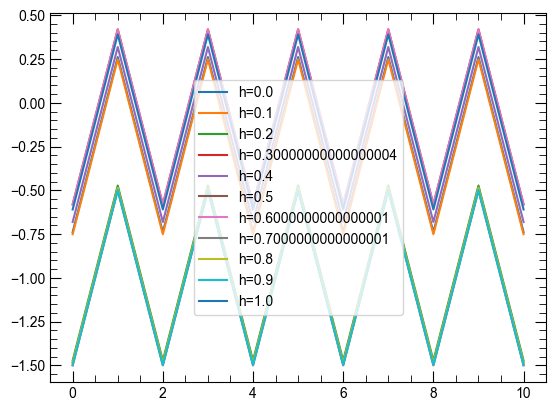

In [26]:
fig, ax = plt.subplots()
for i in range(len(hs)):
    ax.plot(s0js[i], label=f"h={hs[i]}")
ax.legend()

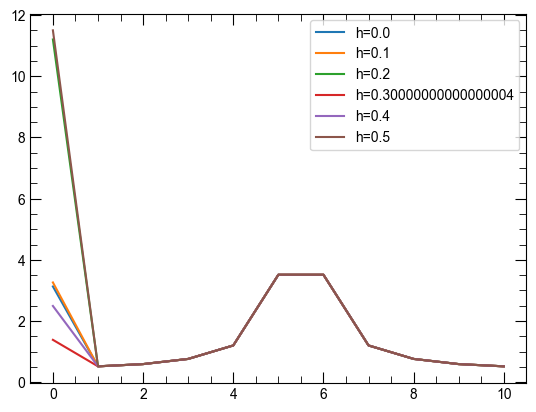

In [27]:
fig, ax = plt.subplots()
for i in range(6):
    ax.plot(np.abs(sks[i]), label=f"h={hs[i]}")
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


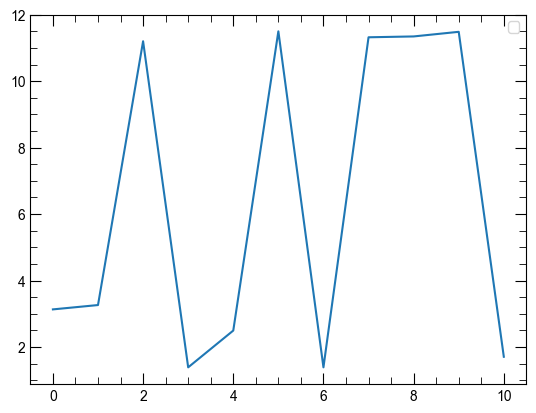

In [31]:
sks = np.array(sks)
fig, ax = plt.subplots()
ax.plot(np.abs(sks[:, 0]))
ax.legend()

In [30]:
sks

array([[ -3.13078339+0.j        ,  -0.5       -0.14681325j,
         -0.5       -0.32133049j,  -0.5       -0.57703076j,
         -0.5       -1.09484728j,  -0.5       -3.47757639j,
         -0.5       +3.47757639j,  -0.5       +1.09484728j,
         -0.5       +0.57703076j,  -0.5       +0.32133049j,
         -0.5       +0.14681325j],
       [ -3.2615771 +0.j        ,  -0.5       -0.14681325j,
         -0.5       -0.32133049j,  -0.5       -0.57703076j,
         -0.5       -1.09484728j,  -0.5       -3.47757639j,
         -0.5       +3.47757639j,  -0.5       +1.09484728j,
         -0.5       +0.57703076j,  -0.5       +0.32133049j,
         -0.5       +0.14681325j],
       [-11.20056095+0.j        ,  -0.5       -0.14681325j,
         -0.5       -0.32133049j,  -0.5       -0.57703076j,
         -0.5       -1.09484728j,  -0.5       -3.47757639j,
         -0.5       +3.47757639j,  -0.5       +1.09484728j,
         -0.5       +0.57703076j,  -0.5       +0.32133049j,
         -0.5       +0.1468132